In [3]:
#CREDIT TO 양재혁 CLASS of 2021
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [4]:
class NN:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        self.lr = learningrate    
        pass
    
    def activation_function(self,x):
        return 1/(1+numpy.exp(-x))
    
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))       
        pass
    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
    
    
training_data_file = pd.read_csv('C:/Users/psw00/PycharmProjects/pythonProject1/mnist_exampledata1.csv')
training_data_list = training_data_file.to_numpy()
test_data_file = pd.read_csv('C:/Users/psw00/PycharmProjects/pythonProject1/mnist_exampledata1.csv')
test_data_list = test_data_file.to_numpy()


def ANN():
  hidden_nodes = int(input("input hidden nodes"))
  learning_rate = float(input("input learning rate"))
  input_nodes = 784
  output_nodes = 10
  epochs = int(input("input epochs"))
  n = NN(input_nodes,hidden_nodes,output_nodes, learning_rate)
  
  pf_list = []
  for e in range(epochs):
    for record in training_data_list:
        inputs = (record[1:] / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[record[0]] = 0.99
        n.train(inputs, targets)
        
    scorecard = []
    for record in test_data_list:
      correct_label = record[0]
      inputs = (record[1:] / 255.0 * 0.99) + 0.01
      outputs = n.query(inputs)
      label = numpy.argmax(outputs)
      if (label == correct_label):
        scorecard.append(1)
      else:
        scorecard.append(0)
        
    scorecard = numpy.asarray(scorecard)
    performance =  scorecard.sum() / scorecard.size
    pf_list.append(performance)
    print('.')

  with open(f"wih_{learning_rate}_{hidden_nodes}","wb")as file:
    pickle.dump(n.wih,file)
  with open(f"who_{learning_rate}_{hidden_nodes}","wb")as file:
    pickle.dump(n.who,file)  
  plt.plot(pf_list)
  plt.xlabel("epochs")
  plt.ylabel("performance")
  plt.title(f"performance by learningrate({learning_rate}) & the number of hidden nodes({hidden_nodes})")
  plt.show()
  print("maximum performance:",max(pf_list),"the epoch:",pf_list.index(max(pf_list)))


In [ ]:
training_data_file = pd.read_csv('https://pjreddie.com/media/files/mnist_train.csv')
training_data_list = training_data_file.to_numpy()
test_data_file = pd.read_csv('https://pjreddie.com/media/files/mnist_test.csv')
test_data_list = test_data_file.to_numpy()

In [ ]:
numpy.shape(test_data_list)

In [8]:
def ANN():
  hidden_nodes = int(input("input hidden nodes"))
  learning_rate = float(input("input learning rate"))
  input_nodes = 784
  output_nodes = 10
  epochs = int(input("input epochs"))
  n = NN(input_nodes,hidden_nodes,output_nodes, learning_rate)
  
  pf_list = []
  for e in range(epochs):
    for record in training_data_list:
        inputs = (record[1:] / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[record[0]] = 0.99
        n.train(inputs, targets)
        
    scorecard = []
    for record in test_data_list:
      correct_label = record[0]
      inputs = (record[1:] / 255.0 * 0.99) + 0.01
      outputs = n.query(inputs)
      label = numpy.argmax(outputs)
      if (label == correct_label):
        scorecard.append(1)
      else:
        scorecard.append(0)
        
    scorecard = numpy.asarray(scorecard)
    performance =  scorecard.sum() / scorecard.size
    pf_list.append(performance)
    print('.')

  with open(f"wih_{learning_rate}_{hidden_nodes}","wb")as file:
    pickle.dump(n.wih,file)
  with open(f"who_{learning_rate}_{hidden_nodes}","wb")as file:
    pickle.dump(n.who,file)  
  plt.plot(pf_list)
  plt.xlabel("epochs")
  plt.ylabel("performance")
  plt.title(f"performance by learningrate({learning_rate}) & the number of hidden nodes({hidden_nodes})")
  plt.show()
  print("maximum performance:",max(pf_list),"the epoch:",pf_list.index(max(pf_list)))

input hidden nodes20
input learning rate0.1
input epochs100
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


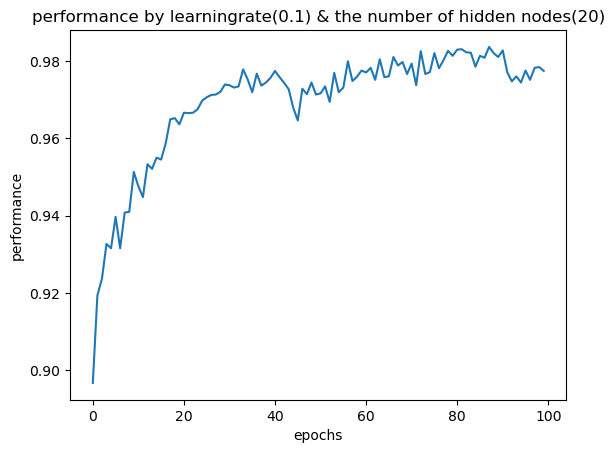

maximum performance: 0.9835983598359836 the epoch: 87


In [9]:
ANN()

In [16]:
ANN()

input hidden nodes50
input learning rate0.01
input epochs15
.
.
.
.
.
.
.
.


KeyboardInterrupt: 

input hidden nodes200
input learning rate0.01


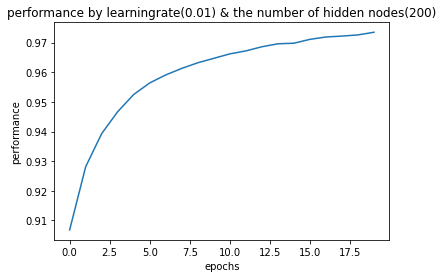

maximum performance: 0.9734973497349735 the epoch: 19


In [ ]:
ANN()

수업 중

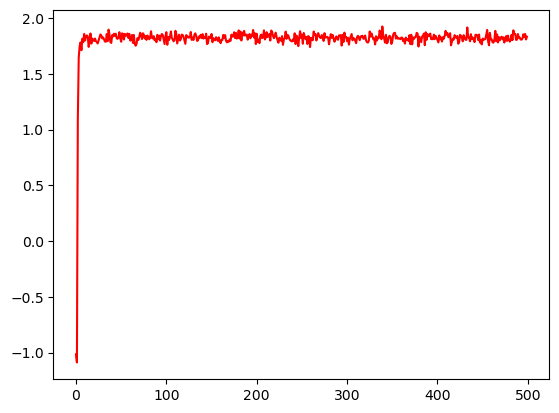

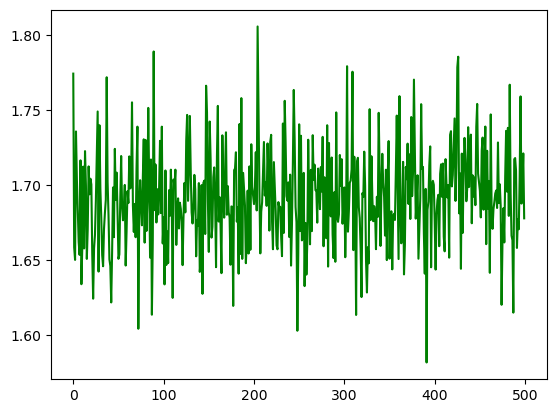

In [7]:
import numpy as np
import matplotlib.pyplot as plt

n_arms = 10  #선택지 개수
n_steps = 500  #500번의 선태
n_trials = 1000  #총 1000회 실행
epsilon = 0  # 가장 수익률 높았던 것 선택

result_array = np.zeros(n_steps) #500개의 0으로 된 수열
P_arm = np.random.randn(n_arms) # average probability of reward amount

for i in range(n_trials):
    
    Q_arm = np.zeros(n_arms) # trial 시작 -> Q_arm 초기화
    N_visits = np.zeros(n_arms) #visit 기록 초기화
    
    for j in range(n_steps):
        R_arm = np.random.normal(P_arm, 1, n_arms) # reward를 정규 분포 이루도록 배치
        
        if np.random.rand() < epsilon:
            action = np.random.choice(n_arms)
        else:
            action = np.argmax(Q_arm) # argmax 자체의 편향 주의 -> 바꾸자
        
        if N_visits[action] == 0:  # n 분모가 0
            Q_arm[action] += R_arm[action]
        else:
            Q_arm[action] += (R_arm[action] - Q_arm[action]) / N_visits[action]
        
        N_visits[action] += 1
        result_array[j] += R_arm[action]

plt.plot(result_array/n_trials, color='red')
plt.show()



n_arms = 10
n_steps = 500
n_trials = 1000
epsilon = 0.01

result_array = np.zeros(n_steps)
P_arm = np.random.randn(n_arms) # average probability of reward amount

for i in range(n_trials):
    
    Q_arm = np.zeros(n_arms)
    N_visits = np.zeros(n_arms)
    
    for j in range(n_steps):
        R_arm = np.random.normal(P_arm, 1, n_arms) # reward를 정규 분포 이루도록 배치
        
        if np.random.rand() < epsilon:
            action = np.random.choice(n_arms)
        else:
            action = np.argmax(Q_arm) # argmax 자체의 편향 주의 -> 바꾸자
        
        if N_visits[action] == 0:  # n 분모가 0
            Q_arm[action] += R_arm[action]
        else:
            Q_arm[action] += (R_arm[action] - Q_arm[action]) / N_visits[action]
        
        N_visits[action] += 1
        result_array[j] += R_arm[action]

plt.plot(result_array/n_trials, color='green')
plt.show()
